In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import talib

In [4]:
stock_data = pd.read_csv('TSLA.csv', index_col='Date', parse_dates=True)
stock_data = stock_data.iloc[-365:]
stock_data = stock_data.drop(['Adj Close', 'Volume'], axis=1)
stock_data

,Open,High,Low,Close
Date,,,,
2019-07-11,47.63,48.30,47.16,47.72
2019-07-12,47.95,49.08,47.94,49.02
2019-07-15,49.60,50.88,48.97,50.70
2019-07-16,49.86,50.71,49.59,50.48
2019-07-17,51.13,51.66,50.67,50.97
...,...,...,...,...
2020-12-11,615.01,624.00,596.80,609.99
2020-12-14,619.00,642.75,610.20,639.83
2020-12-15,643.28,646.90,623.80,633.25


### Calculate the ADX
The average directional movement index (ADX) was developed by J. Welles Wilder as an indicator of trend strength. It combines two other indicators, the plus directional index (+DI) and minus directional indicator (-DI), and is obtained using lengthy calculations. However, with Python, you can calculate it with one line of code. In this exercise, you will implement your first ADX indicator using daily price data of the Tesla stock.

In [5]:
# ADX is calculated based on High / Low / Close
stock_data['ADX_14'] = talib.ADX(
        stock_data['High'],
        stock_data['Low'],
        stock_data['Close'],
        timeperiod = 14
)

In [6]:
# ADX is calculated based on High / Low / Close
stock_data['ADX_21'] = talib.ADX(
        stock_data['High'],
        stock_data['Low'],
        stock_data['Close'],
        timeperiod = 21
)

In [7]:
print(stock_data.tail())

              Open    High    Low   Close     ADX_14     ADX_21
Date                                                           
2020-12-11  615.01  624.00  596.8  609.99  30.708111  22.736224
2020-12-14  619.00  642.75  610.2  639.83  30.351997  22.872343
2020-12-15  643.28  646.90  623.8  633.25  30.118955  23.047114
2020-12-16  628.23  632.50  605.0  622.77  29.154702  22.869302
2020-12-17  628.19  658.82  619.5  655.90  28.917346  22.997637


### Visualize the ADX
The ADX can quantify the strength of a trend, but does not suggest the bullish or bearish trend direction. Typically an ADX value above 25 indicates that a trending market is present. To better understand it, you will calculate the ADX and plot it along with the price data.

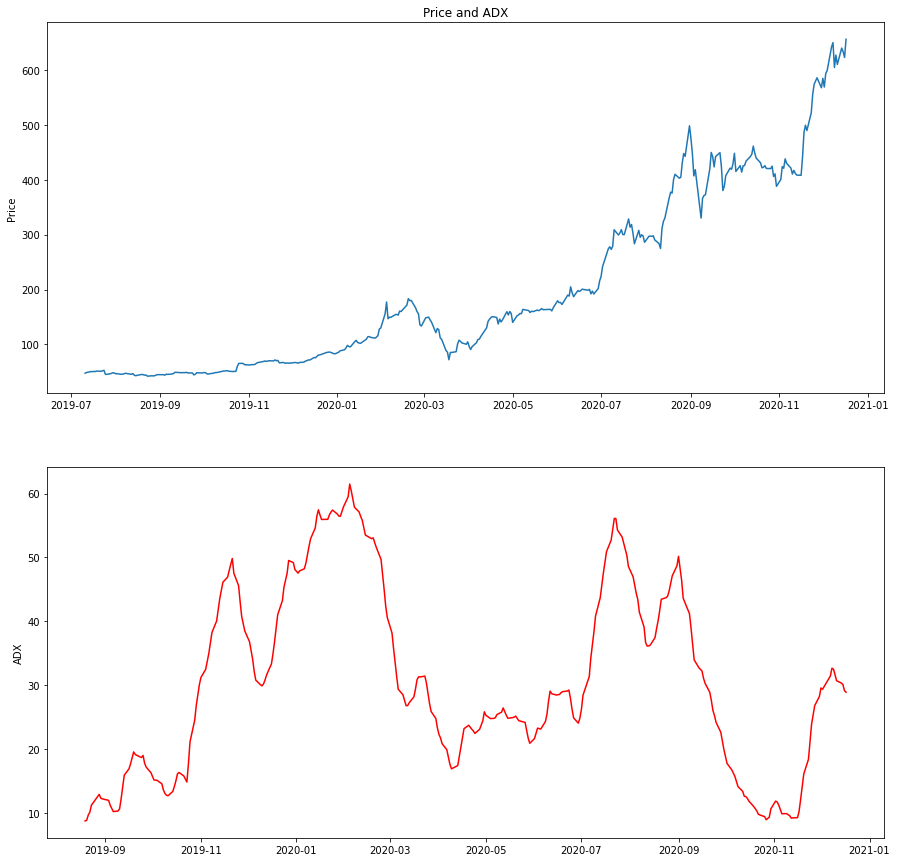

In [8]:
# Calculate ADX
stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(stock_data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()